# P02_06_EDA

In [1]:
section_fig_main_title = 'P02_06_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from numpy import mean
import numpy as np
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

In [4]:
from pandas.plotting import autocorrelation_plot
from sklearn.feature_selection import VarianceThreshold

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [7]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [8]:
# csv_path = "../Data/Data_ICME_scraped.csv"
# data = pd.read_csv(csv_path, parse_dates=True)

csv_path = "../Data/P02_05_EDA_Data.csv"
data = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)

In [9]:
data.head(2)

,ICME Plasma/Field Start Y/M/D (UT) (b),Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0


In [10]:
keep_cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)',
             'solar wind speed km/s',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*']
data = data[keep_cols]

In [11]:
data.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,370,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,360,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
2,1996-08-07 12:00:00,350,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
3,1996-12-23 17:00:00,360,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
4,1997-01-10 04:00:00,450,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [12]:
for col in data.columns:
    if col != 'ICME Plasma/Field Start Y/M/D (UT) (b)':
        print(f'{col} = ', data[col].nunique(),'\n')
        print(f'{col} = ', data[col].unique(), '\n\n')

solar wind speed km/s =  51 

solar wind speed km/s =  [ 370  360  350  450  460  340  380  400  390  410  440  430  500  510
  530  320  520  550  470  650  420  640  570  540  490  670  620  480
  560  610  780  740  580  600  790  290  730  330  720  590  680 1300
  800  870  630  810  900  750  310  660  300] 


forward fast shock happens =  2 

forward fast shock happens =  ['No' 'Yes'] 


"quality" of the boundary times* =  5 

"quality" of the boundary times* =  [2.  3.  1.  2.5 3.5] 


Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  3 

Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  ['no Evidence' 'some Evidence' nan
 'intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined'] 


Increase in solar wind speed at the upstream disturbance (shock/wave)* =  38 

Increase in solar wind speed at the upstream disturbance (shock/wave)* =  [  0  40  10  20 100  90 150  70  30 

In [13]:
data.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)', 'solar wind speed km/s',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

In [14]:
data_2 = data.dropna()

In [15]:
data_2.head(2)

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,370,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,360,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0


In [16]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)                                  501 non-null    object 
 1   solar wind speed km/s                                                   501 non-null    int64  
 2   forward fast shock happens                                              501 non-null    object 
 3   "quality" of the boundary times*                                        501 non-null    float64
 4   Evidence of BiDirectional suprathermal Electron strahls (BDE)*          501 non-null    object 
 5   Increase in solar wind speed at the upstream disturbance (shock/wave)*  501 non-null    int64  
 6   magnetic cloud has been reported*                                       501 non-nul

In [17]:
for col in data_2.columns:
    if col != 'ICME Plasma/Field Start Y/M/D (UT) (b)':
        print(f'{col} = ', data_2[col].nunique(),'\n')
        print(f'{col} = ', data_2[col].unique(), '\n\n')

solar wind speed km/s =  51 

solar wind speed km/s =  [ 370  360  350  450  460  340  380  400  390  410  440  430  500  510
  530  320  520  550  470  650  420  640  570  540  490  670  620  480
  560  610  780  740  580  600  790  290  730  330  720  590  680 1300
  800  870  630  810  900  750  660  300  310] 


forward fast shock happens =  2 

forward fast shock happens =  ['No' 'Yes'] 


"quality" of the boundary times* =  5 

"quality" of the boundary times* =  [2.  3.  1.  2.5 3.5] 


Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  3 

Evidence of BiDirectional suprathermal Electron strahls (BDE)* =  ['no Evidence' 'some Evidence'
 'intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined'] 


Increase in solar wind speed at the upstream disturbance (shock/wave)* =  38 

Increase in solar wind speed at the upstream disturbance (shock/wave)* =  [  0  40  10  20 100  90 150  70  30  60 

In [18]:
data = data_2

# Check out columns unique values percentage

In [19]:
uniq_index = list(data.nunique().index)
uniq_values = list(data.nunique())

num_rows = data.shape[0]

uniq_percent = [(val*100)/num_rows for val in uniq_values]
for i, uniq in enumerate(uniq_percent):
    
    # print columns with low number of unique values
#     if uniq < 1:

        
    print(uniq_index[i])
    print(round(uniq, 2))

ICME Plasma/Field Start Y/M/D (UT) (b)
100.0
solar wind speed km/s
10.18
forward fast shock happens
0.4
"quality" of the boundary times*
1.0
Evidence of BiDirectional suprathermal Electron strahls (BDE)*
0.6
Increase in solar wind speed at the upstream disturbance (shock/wave)*
7.58
magnetic cloud has been reported*
0.8
minimum value of the geomagnetic*
31.54
Mean 1 AU transit speed of the disturbance*
24.35


# Data distribution

checking out the data skewness and distribution

In [20]:
data_2.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),solar wind speed km/s,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
0,1996-05-27 15:00:00,370,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1,1996-07-01 18:00:00,360,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
2,1996-08-07 12:00:00,350,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
3,1996-12-23 17:00:00,360,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
4,1997-01-10 04:00:00,450,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ICME Plasma/Field Start Y/M/D (UT) (b)                                  501 non-null    object 
 1   solar wind speed km/s                                                   501 non-null    int64  
 2   forward fast shock happens                                              501 non-null    object 
 3   "quality" of the boundary times*                                        501 non-null    float64
 4   Evidence of BiDirectional suprathermal Electron strahls (BDE)*          501 non-null    object 
 5   Increase in solar wind speed at the upstream disturbance (shock/wave)*  501 non-null    int64  
 6   magnetic cloud has been reported*                                       501 non-nul

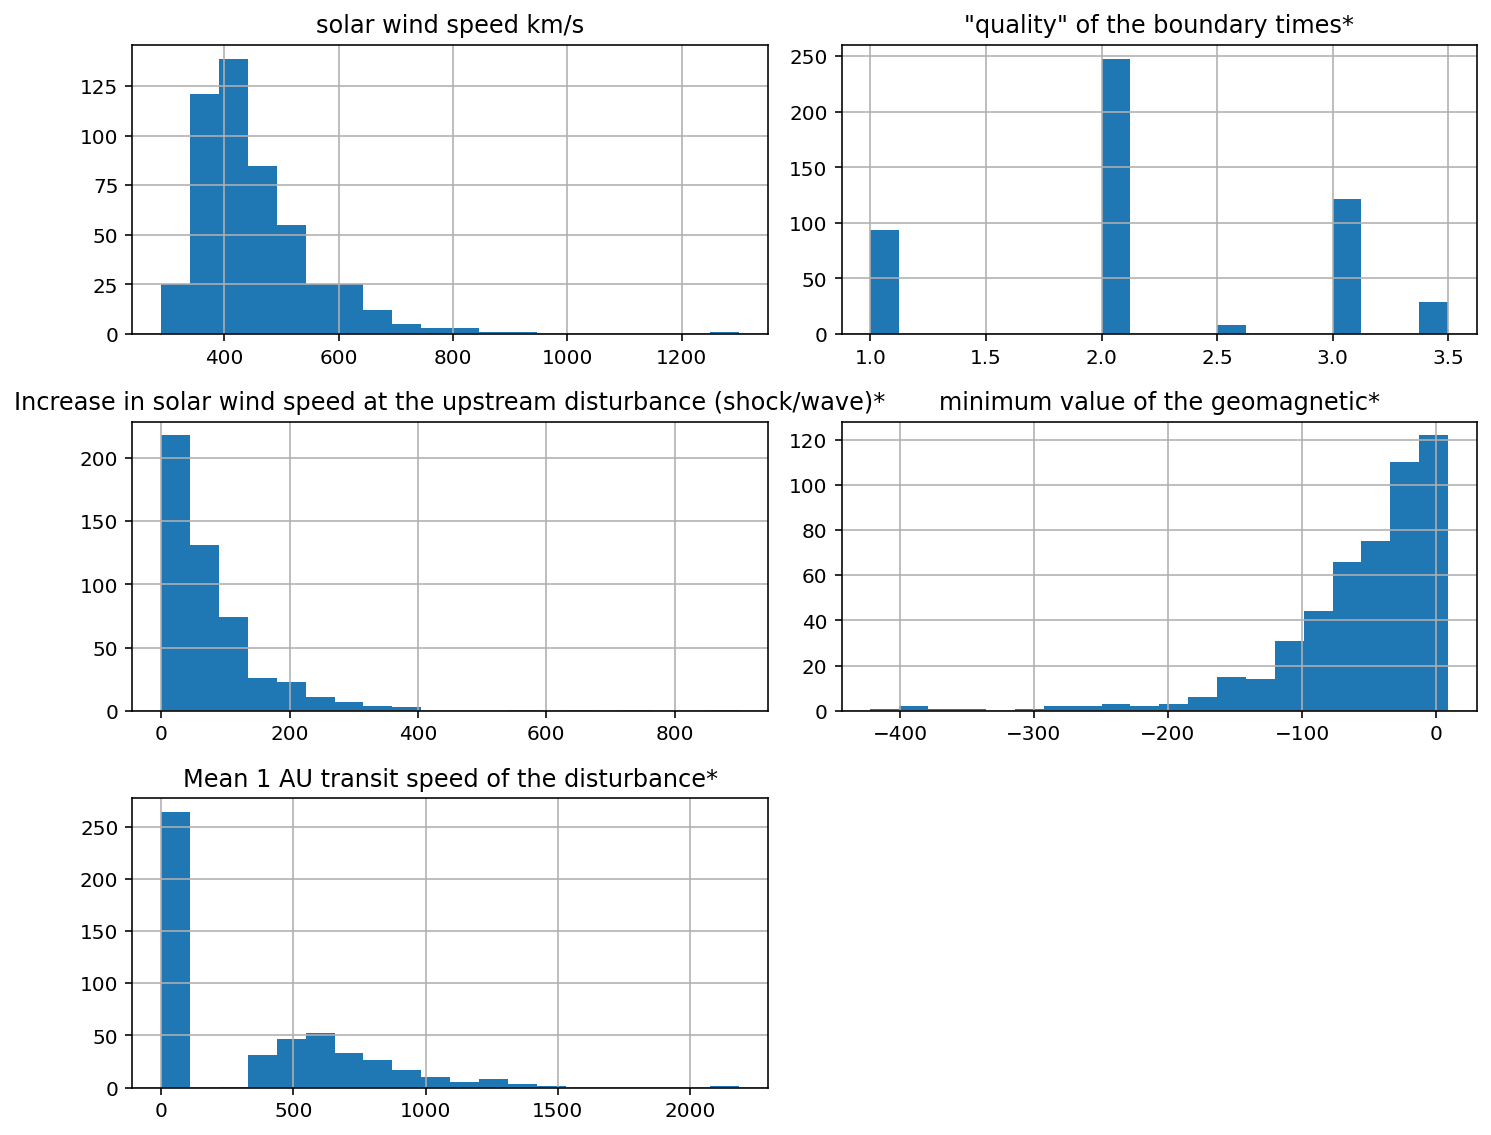

In [22]:
data_2.hist(bins=20, 
            figsize=(10,8), 
#             log=True,
           )

plt.tight_layout()
plt.show()

In [23]:
data_2.columns

Index(['ICME Plasma/Field Start Y/M/D (UT) (b)', 'solar wind speed km/s',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

data distribution is skewed and is semi gaussian

# Automatic Outlier Detection using Local Outlier Factor (LOF)

In [24]:
cols_trans = ['solar wind speed km/s', 
            '"quality" of the boundary times*',
            'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
            'minimum value of the geomagnetic*',
            'Mean 1 AU transit speed of the disturbance*'
            ]
data_3 = data_2[cols_trans]

In [25]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

applying transform on train set (67%).




In [26]:
# split into inpiut and output elements
X = data_3.drop(['solar wind speed km/s'], axis=1)
y = data_3['solar wind speed km/s']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(335, 4) (335,)


# Outlier transformer on Training data

In [27]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]

# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(301, 4) (301,)


The number of rows decreased from 335 to 301. 

The auto outlier found 34 outliers

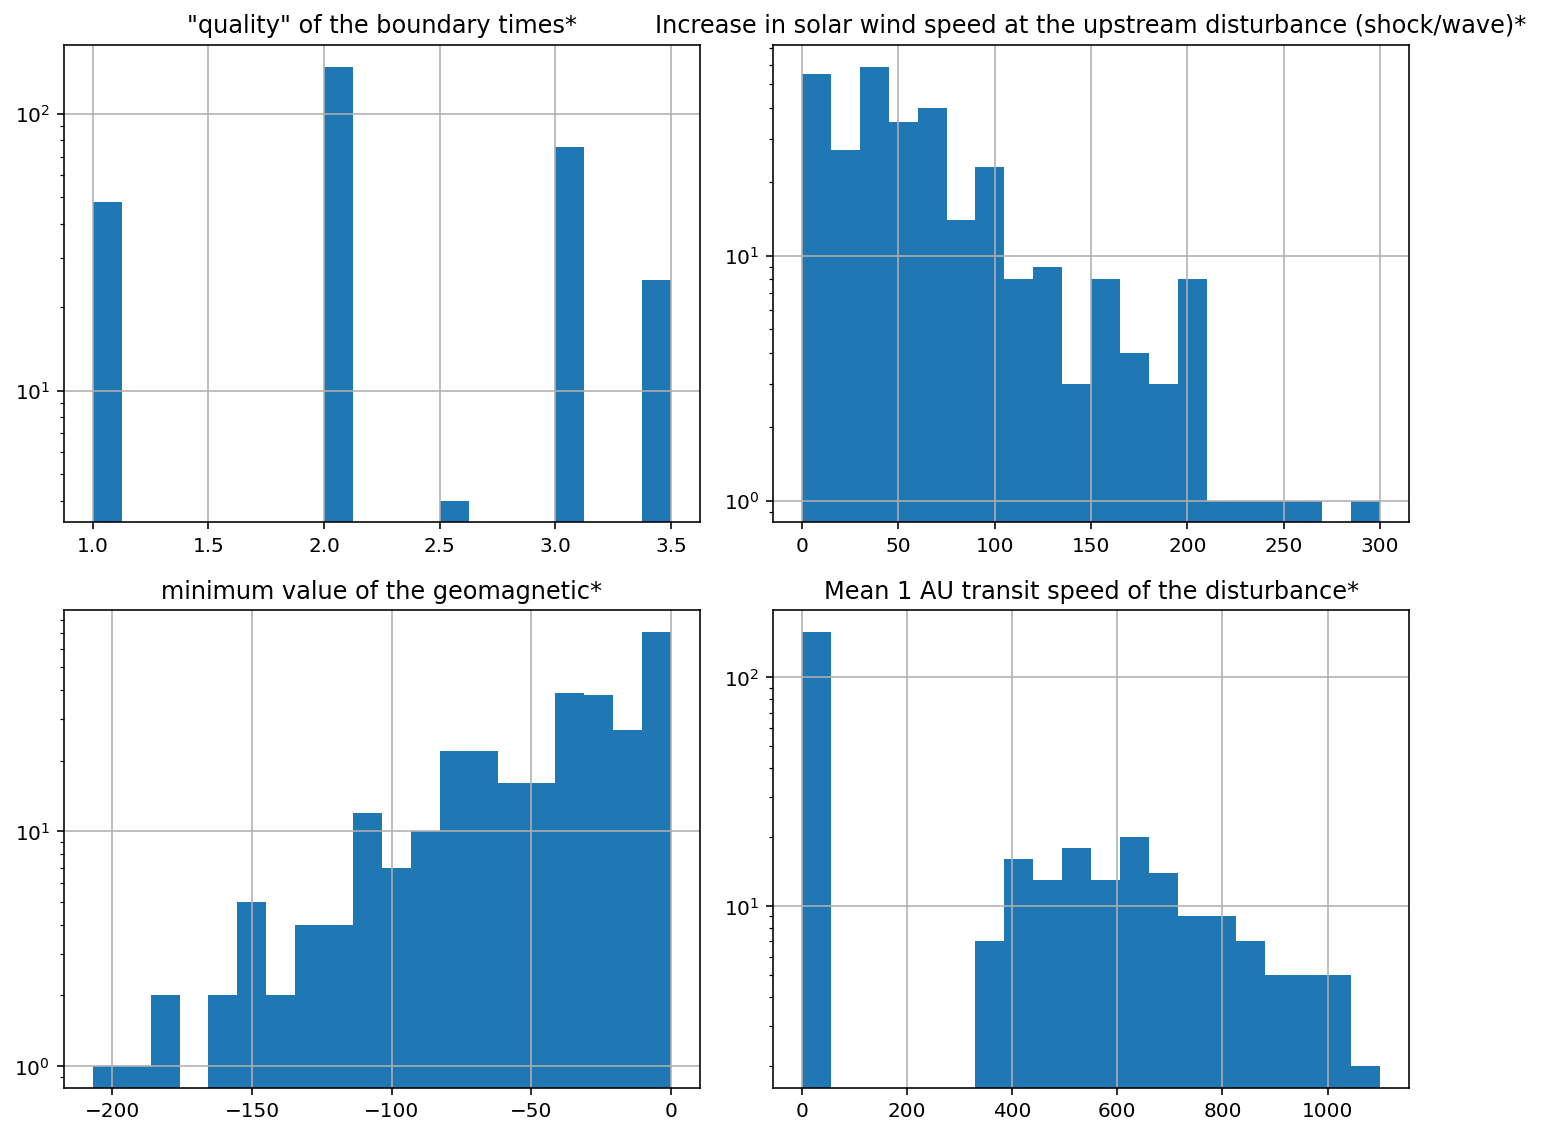

In [28]:
X_train.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

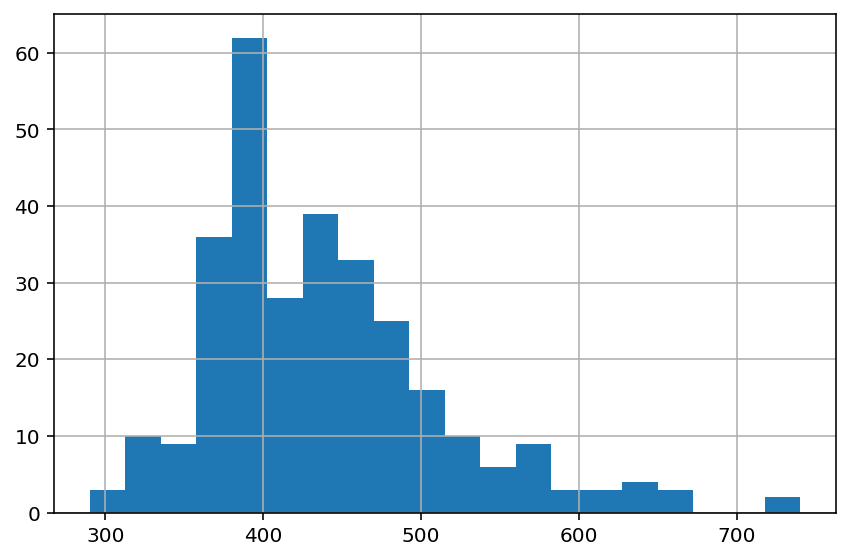

In [29]:
y_train.hist(bins=20, 
#             figsize=(10,8), 
#             log=True,
           )

plt.tight_layout()
plt.show()

# Apply Outlier on test 

### Avoid data leakage

In [30]:
# lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_test)

In [31]:
print(X_test.shape, y_test.shape)

(166, 4) (166,)


In [32]:
# select all rows that are not outliers
mask = yhat != -1
X_test, y_test = X_test.iloc[mask, :], y_test.iloc[mask]

# summarize the shape of the updated training dataset
print(X_test.shape, y_test.shape)

(149, 4) (149,)


the number of rows decreased from 166 to 149.

# MinMax & PowerTransformer on training data

Transfer columns to gaussian or more gaussian distribution

In [33]:
# prepare the model with input scaling and power transform
steps = list()
# steps.append(('LOF', LocalOutlierFactor()))
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
pipeline = Pipeline(steps=steps)
trans_np = pipeline.fit_transform(X_train,y_train)

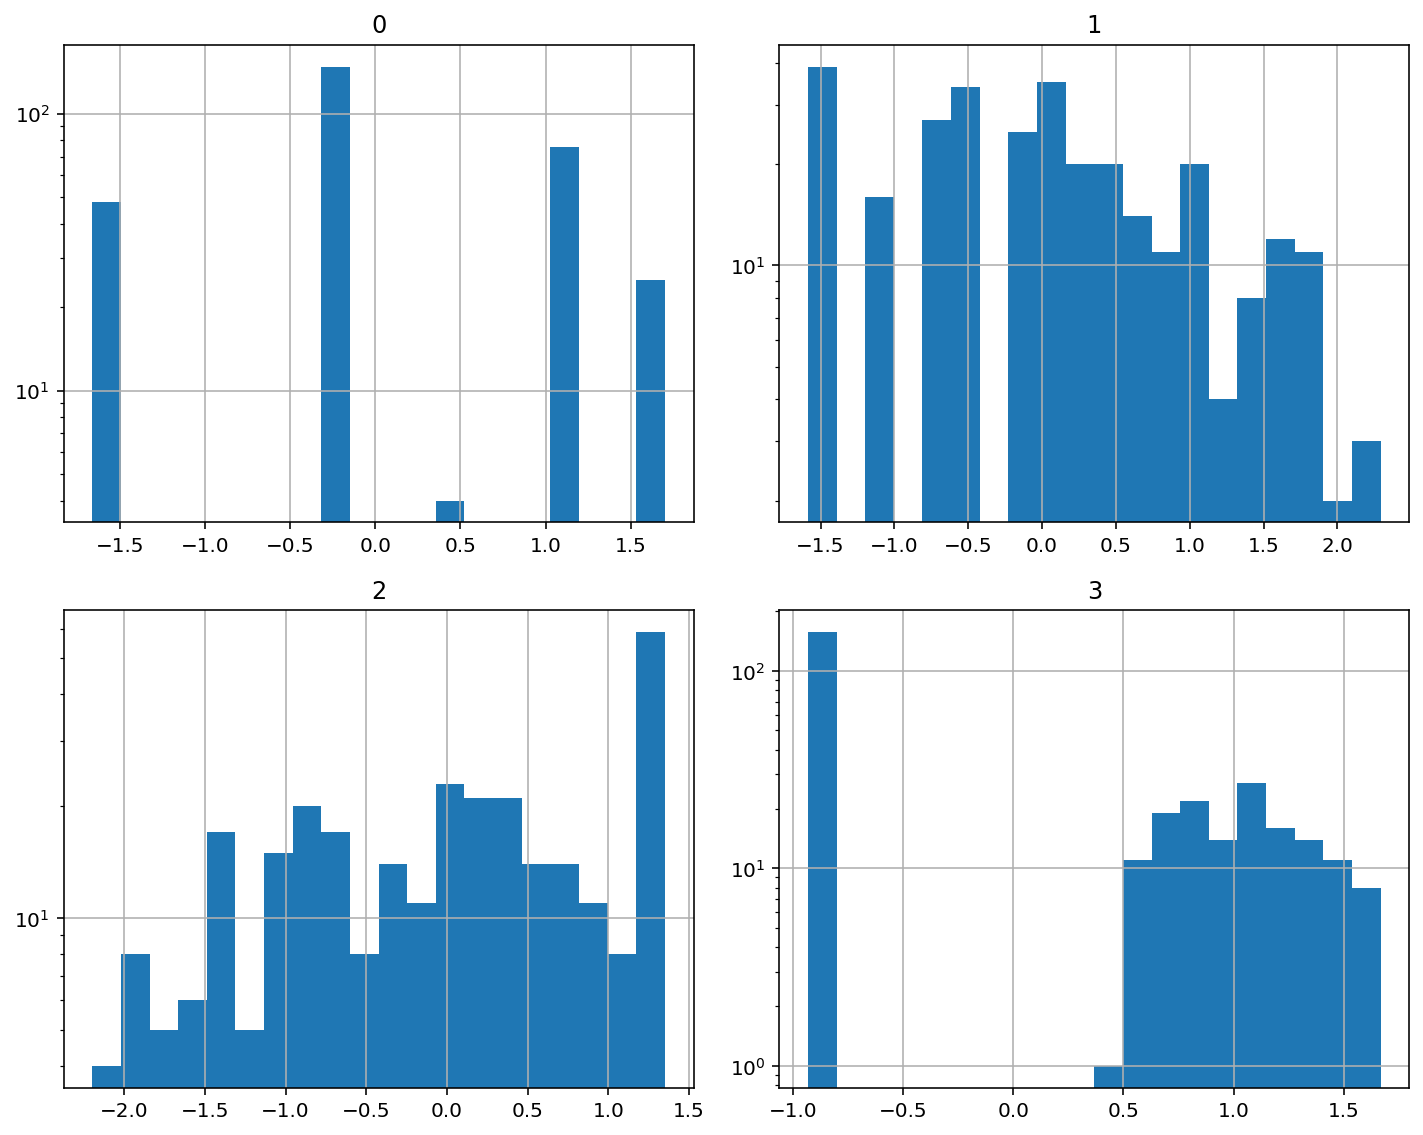

In [34]:
trans_df = pd.DataFrame(trans_np)

trans_df.hist(bins=20, 
            figsize=(10,8), 
            log=True,
           )

plt.tight_layout()
plt.show()

# MinMaxScaler, PowerTransformer & HuberRegressor on training data

In [35]:
# prepare the model with input scaling and power transform
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor()))
pipeline = Pipeline(steps=steps)

In [36]:
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline)

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, 
                         scoring='neg_mean_absolute_error', 
                         cv=cv, n_jobs=-1)

# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 47.284


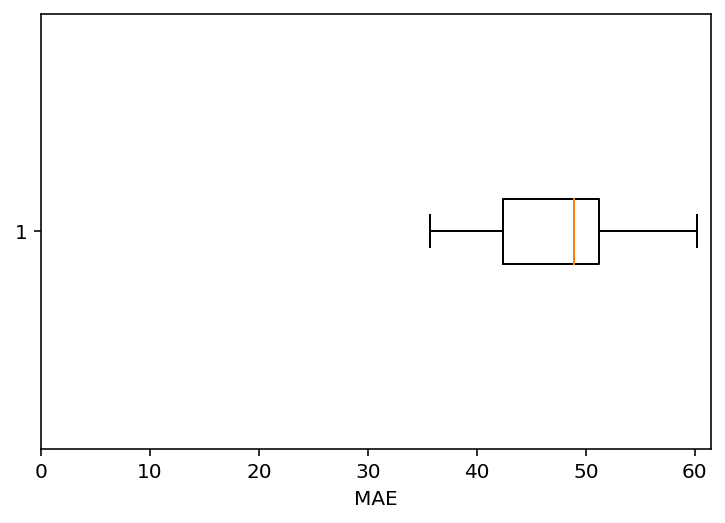

In [37]:
plt.boxplot(scores, vert=False)
plt.xlim(0, )
plt.xlabel('MAE')
plt.show()

# Fit and Predict with whole pipeline

Note that the LOF was applied already on train set (fit) and then on test set.

In [38]:
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor(max_iter=200)))
pipeline = Pipeline(steps=steps)

In [39]:
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
yhat = pipeline.predict(X_test)

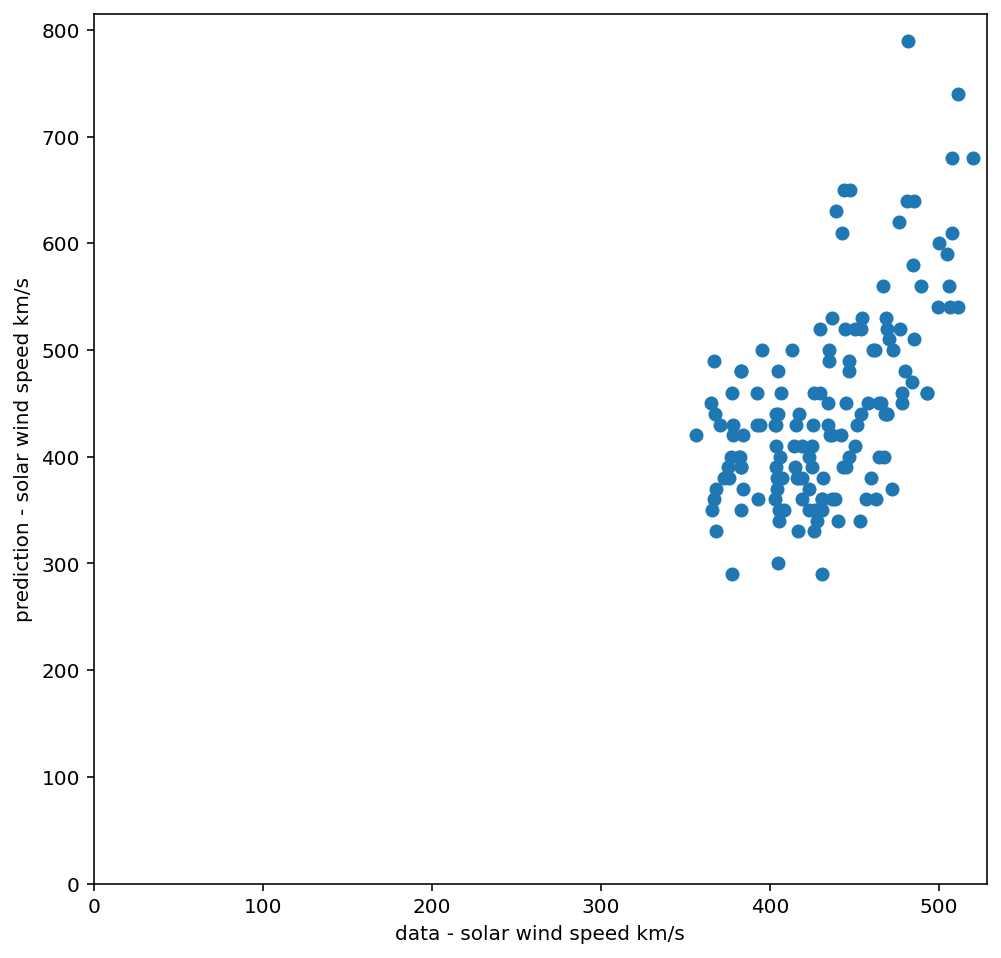

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(yhat, y_test)
plt.ylabel('prediction - solar wind speed km/s')
plt.xlabel('data - solar wind speed km/s')
plt.xlim(0, )
plt.ylim(0, )
plt.show()